In [3]:
from keras.models import load_model
import pandas as pd
import os
import cv2
import numpy as np

In [2]:

test = pd.read_csv(r"..\data\test\GTSRB\GT_final_test.csv", sep=';')

# Load test dataset
X_test = []
y_test = []
i = 0
print(list(test))
# print(list(test['Filename']))
# print(list(test['ClassId']))
count = 0
for file_name, class_id in zip(list(test['Filename']), list(test['ClassId'])):
    img_path = os.path.join(r'..\data\test\GTSRB', file_name)
#     print(img_path)
    if count >= 100:
        break;
    img = cv2.imread(img_path)
    img = cv2.resize(img,(32,32))
    red_channel =img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]

    #convert image to gray by red, greeen, blue channel
    gray_img = 0.2989 * red_channel + 0.5870 * green_channel + 0.1140 * blue_channel

    if (np.max(gray_img)>1):
        gray_img = gray_img/255.
  
    X_test.append(gray_img)
    y_test.append(class_id)

X_test = np.array(X_test)
X_test=X_test.reshape(X_test.shape +(1,))
y_test = np.array(y_test)
print(y_test.shape)
print(X_test.shape)

['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
(12630,)
(12630, 32, 32, 1)


In [3]:

model_path = "model_2018_10_14_10_07.h5"
model = load_model(model_path)

In [5]:
model.summary()
from keras.utils import plot_model
plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [6]:
print(X_test.shape)
print(y_test)


(12630, 32, 32, 1)
[16  1 38 ...  6  7 10]


In [9]:
y_pred = model.predict_classes(X_test[0:100,:,:,:])
y_test_1 = y_test[0:100]
print(y_pred)
print(np.max(y_pred))
acc = np.sum(y_pred == y_test_1) / np.size(y_pred)
print("Test accuracy = {}".format(acc))

[16  1 38 33 11 38 18 12 25 35 12  7 23  7  4  9 21 20 27 38  4 33  9  3
  1 11 13 10  9 11  3 17 34 19  2 17  3 12 16  8  7 30 18 12 24 25  3 10
 30  8 39 13 15  9 13 35  5 26  9 16 38 10  4  9 15  9 26  2  5 28 11 25
 24 34  5 42  1 10 25 25 21 33 25  3 10 35  3  7 22 13  3  1  2 14 12 32
  3 38  9 33]
42
Test accuracy = 0.93


Confusion matrix, without normalization
[[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


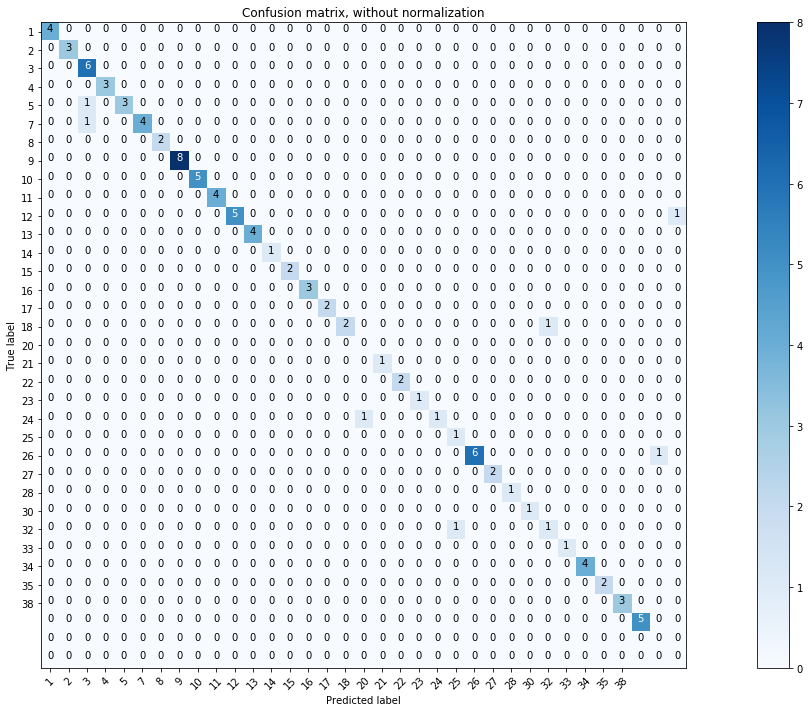

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_1, y_pred)
np.set_printoptions(precision=2)

classes = np.arange(0,43);
classes = np.unique(y_test_1)

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')
plt.show()

In [13]:
np.arange(0,43)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [2]:
import tensorflow as tf
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]
